### Use route 79 from the dataset to test different regression models

In [2]:
# Tests of preliminary multivariate linear regression model (simple linear 
# regression) on route 79 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py


# Read in data
clean_data = pd.read_csv('./data/clean_bus_project_data_2012_2019.csv')

route79 = clean_data.loc[(clean_data['route'] == '79')]

In [ ]:
print(route79.info())
print(route79.head(20))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 50 to 340530
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   route    2923 non-null   object        
 1   date     2923 non-null   datetime64[ns]
 2   daytype  2923 non-null   float64       
 3   rides    2923 non-null   int64         
 4   PRCP     2923 non-null   float64       
 5   SNOW     2923 non-null   float64       
 6   SNWD     2923 non-null   float64       
 7   TAVG     2923 non-null   float64       
 8   TMAX     2923 non-null   float64       
 9   TMIN     2923 non-null   float64       
 10  Holiday  2923 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 274.0+ KB
None
     route       date  daytype  rides      PRCP      SNOW      SNWD  \
50      79 2012-01-01      0.0  13811  0.025275  0.000000  0.000000   
139     79 2012-01-02      0.0  14697  0.016667  0.137838  0.125000   
238 

Text(0.5, 1.0, 'Ridership of Route 79')

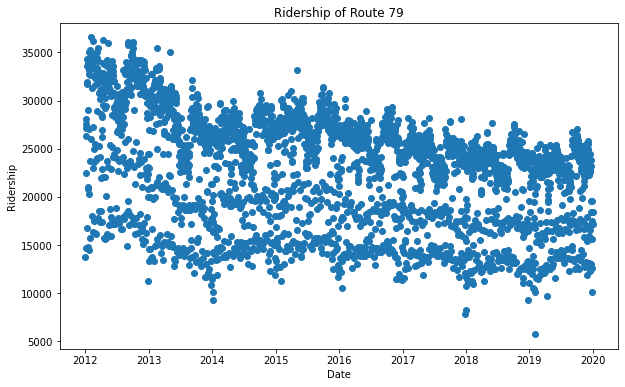

In [ ]:
plt.scatter(route79['date'], route79['rides'])
plt.xlabel('Date')
plt.ylabel('Ridership')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Ridership of Route 79")

In [ ]:
# Change order of columns
route79 = route79[['route', 'date', 'daytype', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 
                   'TMAX', 'TMIN', 'Holiday', 'rides']]

In [ ]:
print(route79.head())

    route       date  daytype      PRCP      SNOW      SNWD   TAVG  TMAX  \
50     79 2012-01-01      0.0  0.025275  0.000000  0.000000  36.30  44.6   
139    79 2012-01-02      0.0  0.016667  0.137838  0.125000  26.20  33.4   
238    79 2012-01-03      1.0  0.003448  0.027500  0.025532  19.25  26.3   
373    79 2012-01-04      1.0  0.000000  0.000000  0.000000  28.40  36.8   
508    79 2012-01-05      1.0  0.000000  0.000000  0.000000  36.45  47.0   

     TMIN  Holiday  rides  
50   28.0      0.0  13811  
139  19.0      0.0  14697  
238  12.2      0.0  27544  
373  20.0      0.0  27165  
508  25.9      0.0  26364  


In [ ]:
route79['date'] = pd.to_numeric(pd.to_datetime(route79['date']))

In [ ]:
print(route79.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 50 to 340530
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   route    2923 non-null   object        
 1   date     2923 non-null   datetime64[ns]
 2   daytype  2923 non-null   float64       
 3   PRCP     2923 non-null   float64       
 4   SNOW     2923 non-null   float64       
 5   SNWD     2923 non-null   float64       
 6   TAVG     2923 non-null   float64       
 7   TMAX     2923 non-null   float64       
 8   TMIN     2923 non-null   float64       
 9   Holiday  2923 non-null   float64       
 10  rides    2923 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 274.0+ KB
None


In [3]:
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

X = route79.values[:, 1:9]
y = route79.values[:, 10]


In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
model_lin = linear_model.LinearRegression()
model_lin.fit(X_train, y_train)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
print("coef = ", model_lin.coef_)
print('intercept = ', model_lin.intercept_)

coef =  [-2.87056659e-14 -9.23739234e-04  1.07174109e-02 -4.55573534e-02
 -2.93571777e-01  6.31526656e+00  6.55825366e+00  5.98011672e+00]
intercept =  63732.41788832283


In [ ]:
y_pred=model_lin.predict(X_test)

y_pred

array([22208.48426334, 21646.36623038, 23017.40940023, 19178.04828115,
       25691.70577662, 24028.21647547, 24499.86911205, 20289.40537626,
       20960.39883882, 26113.98379792, 22211.51511395, 24795.98572807,
       22080.27168085, 22725.13089289, 20294.05079079, 25926.90695266,
       20515.62409065, 20060.36349766, 23676.66817373, 26868.83595385,
       24366.22192134, 19510.92688011, 23928.45241326, 19301.85528551,
       24443.3665713 , 22534.89579324, 26850.66214649, 23205.88785251,
       22082.17888447, 23605.99652238, 21511.43057713, 19821.24099911,
       25859.31061482, 23892.84694267, 22575.92338247, 25771.3637663 ,
       21992.96035494, 23950.51990789, 25186.04144136, 23823.80178218,
       19890.55306891, 23412.35817091, 25508.14559356, 23425.4666161 ,
       22714.80665134, 22715.41365461, 26427.22990175, 23796.28052901,
       23730.52074759, 26577.10447592, 26182.222132  , 26316.37221566,
       24701.03047076, 20762.35782008, 21995.87977615, 22896.05922367,
      

In [5]:
import numpy as np
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

NameError: name 'y_pred' is not defined

Text(0.5, 1.0, 'Ridership From Dataset Vs Ridership Predicted By Model')

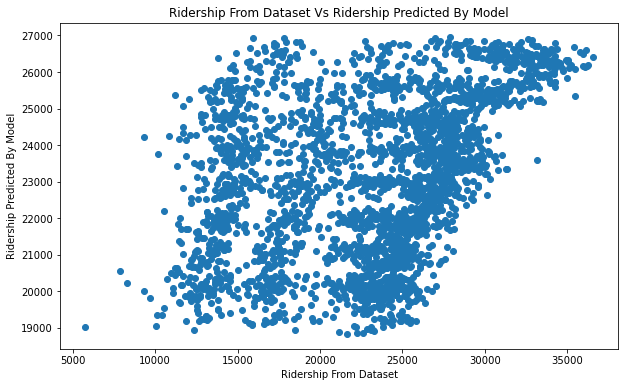

In [ ]:
plt.scatter(y, model_lin.predict(X))
plt.xlabel('Ridership From Dataset')
plt.ylabel('Ridership Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Ridership From Dataset Vs Ridership Predicted By Model")

In [ ]:
# Tests of preliminary multivariate linear regression model (Ridge Regression) on route 79 


In [ ]:
X = route79.values[:, 1:9]
y = route79.values[:, 10]

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
model_ridge = linear_model.Ridge(alpha = 5)
model_ridge.fit(X_train, y_train)

/Users/mariacuevas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.25394e-35): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=5)

In [ ]:
print("coef = ", model_ridge.coef_)
print('intercept = ', model_ridge.intercept_)

coef =  [-2.79692040e-14  9.46653902e+03 -6.20945614e+02 -5.39001631e+02
 -1.71893922e+02  4.35205948e+01  4.00526611e-01 -3.65954843e+01]
intercept =  56535.025127008215


In [ ]:
y_pred=model_ridge.predict(X_test)

y_pred

array([18905.27324746, 25948.84123764, 26655.2802056 , 27300.91475495,
       13937.90726268, 24156.24612122, 26598.88444449, 12680.78229735,
       23263.63403471, 17205.74470151, 26199.34471215, 24803.61603604,
       27198.34313668, 24920.47888289, 25837.14527807, 16317.00904643,
       22931.2862281 , 18214.4754074 , 23811.46017709, 25821.02586407,
       28191.76356609, 16527.30688751, 27964.81011615, 16327.23979614,
       24888.29268754, 25878.94053373, 13800.3654958 , 18933.24061511,
       27664.29000838, 28304.19605013, 28183.83565693, 13477.11395928,
       22610.51471608, 23172.3198543 , 24162.45500494, 24439.00343552,
       28306.03113077, 23688.91427693, 21807.76827511, 17007.83948689,
       19532.62386203, 22515.32834303, 27665.6580718 , 16181.85948351,
       16007.34102765, 26369.66540705, 29649.82943563, 26449.57095789,
       16026.89219504, 24997.59776945, 28435.60252352, 23091.03989944,
       23848.09985237, 16342.45831475, 24956.31010987, 25908.17012475,
      

In [ ]:
import numpy as np
from sklearn import metrics

rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

2755.275875939711

Text(0.5, 1.0, 'Ridership From Dataset Vs Ridership Predicted By Model')

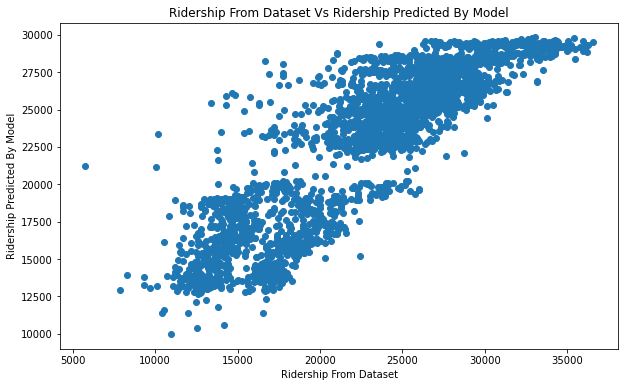

In [ ]:
plt.scatter(y, model_ridge.predict(X))
plt.xlabel('Ridership From Dataset')
plt.ylabel('Ridership Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Ridership From Dataset Vs Ridership Predicted By Model")

In [ ]:
# Tests of preliminary multivariate linear regression model (LASSO Regression) on route 79 

In [ ]:
X = route79.values[:, 1:9]
y = route79.values[:, 10]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
model_l = linear_model.Lasso(alpha = 0.55)
model_l.fit(X_train, y_train)


/Users/mariacuevas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.536e+09, tolerance: 6.470e+06
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.55)

In [ ]:
print("coef = ", model_l.coef_)
print('intercept = ', model_l.intercept_)

coef =  [-2.90771362e-14  9.62127611e+03 -6.17686169e+02 -7.24245882e+02
 -1.55712440e+02  3.15381531e+01 -3.07455426e+00 -1.73099230e+01]
intercept =  58074.839273049816


In [ ]:
y_pred=model_ridge.predict(X_test)

y_pred

array([23417.92912448, 24298.75681283, 28622.91772002, 27361.20412818,
       25302.61088904, 25181.40282442, 28219.4548667 , 23219.03681023,
       22114.32609017, 22447.61038117, 28063.20641324, 19009.39283643,
       24019.21389707, 14594.31995828, 26457.78803104, 26585.06387406,
       25719.7626971 , 27683.56022931, 15844.65752658, 24666.00841534,
       25480.23781918, 22945.43065964, 15764.90841916, 26819.03783964,
       29166.97995958, 24279.02129071, 29170.99993091, 14065.66177133,
       17064.0795843 , 22807.97935309, 23132.04859952, 24211.06004766,
       20082.36042127, 27986.39876979, 25705.6489667 , 24528.18524573,
       16335.69735613, 25147.59452191, 29268.84759834, 22861.12840568,
       26652.1289795 , 25208.6959929 , 27725.40062258, 29393.0188661 ,
       19393.6149289 , 16131.72902876, 23535.0739518 , 26422.20516922,
       24996.99520376, 20211.34152057, 14837.92451966, 26786.243114  ,
       25306.50108482, 25341.79861093, 24211.41393451, 26314.18195421,
      

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

2778.4031995970963

Text(0.5, 1.0, 'Ridership From Dataset Vs Ridership Predicted By Model')

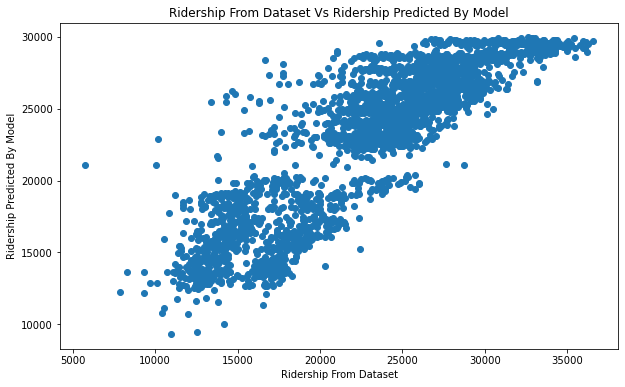

In [ ]:
plt.scatter(y, model_l.predict(X))
plt.xlabel('Ridership From Dataset')
plt.ylabel('Ridership Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Ridership From Dataset Vs Ridership Predicted By Model")

### Use RandomizedSearchCV for hyperparameter tuning 

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso

In [ ]:


# Test ridge model
kf = KFold(n_splits=5, shuffle=False)
param_grid = {'alpha': np.arange(0.00001, 1, 10),"solver": ['sag', 'lsqr', 'saga']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'sag', 'alpha': 1e-05} 0.1303649149468687


In [ ]:
# test lasso model
param_grid = {'alpha': np.arange(0.0001, 50, 10)}
lasso = Lasso()
lasso_cv = RandomizedSearchCV(lasso, param_grid, cv=kf, n_iter=2)
lasso_cv.fit(X_train, y_train)
print(lasso_cv.best_params_, lasso_cv.best_score_)

{'alpha': 10.0001} 0.7641088583906733


/Users/mariacuevas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.339e+09, tolerance: 5.155e+06
  model = cd_fast.enet_coordinate_descent(
/Users/mariacuevas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.360e+09, tolerance: 5.219e+06
  model = cd_fast.enet_coordinate_descent(
/Users/mariacuevas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

/Users/mariacuevas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.142e+10, tolerance: 9.253e+06
  model = cd_fast.enet_coordinate_descent(


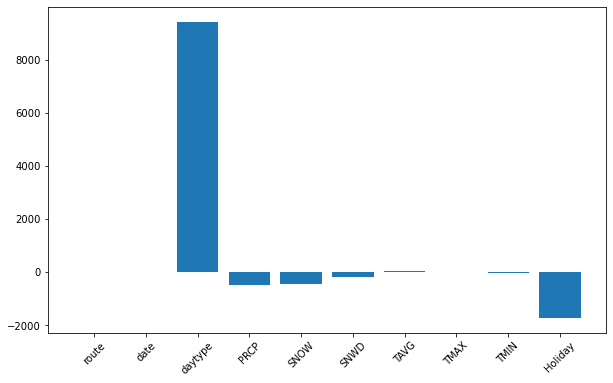

In [ ]:
Xc = route79.drop("rides", axis=1).values
yc = route79["rides"].values
names = route79.drop("rides", axis=1).columns
lasso = Lasso(alpha=20)
lasso_coef = lasso.fit(Xc, yc).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()
 

### Scale independent variables and re-test lasso and ridge models

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

1.8144714211426614e+17 4.8075484689455616e+17
2.9154478331896586e-15 1.0000000000000027


In [ ]:
# test lasso model
param_grid = {'alpha': np.arange(0.0001, 50, 10)}
lasso = Lasso()
lasso_cv = RandomizedSearchCV(lasso, param_grid, cv=kf, n_iter=2)
lasso_cv.fit(X_train_scaled, y_train)
print(lasso_cv.best_params_, lasso_cv.best_score_)

{'alpha': 20.0001} 0.7599966879561684


Text(0.5, 1.0, 'Ridership From Dataset Vs Ridership Predicted By Model (Lasso)')

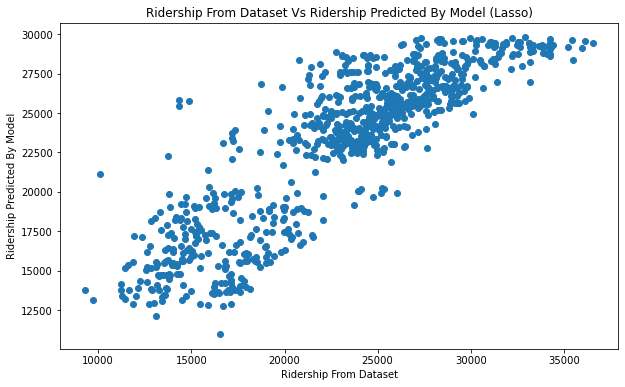

In [ ]:
plt.scatter(y_test, lasso_cv.predict(X_test_scaled))
plt.xlabel('Ridership From Dataset')
plt.ylabel('Ridership Predicted By Model')
plt.title("Ridership From Dataset Vs Ridership Predicted By Model (Lasso)")

In [ ]:
# Test ridge model
kf = KFold(n_splits=5, shuffle=False)
param_grid = {'alpha': np.arange(0.0001, 1, 10),"solver": ['sag', 'lsqr', 'saga']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train_scaled, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'sag', 'alpha': 0.0001} 0.7603163909789435


Text(0.5, 1.0, 'Ridership From Dataset Vs Ridership Predicted By Model (Ridge)')

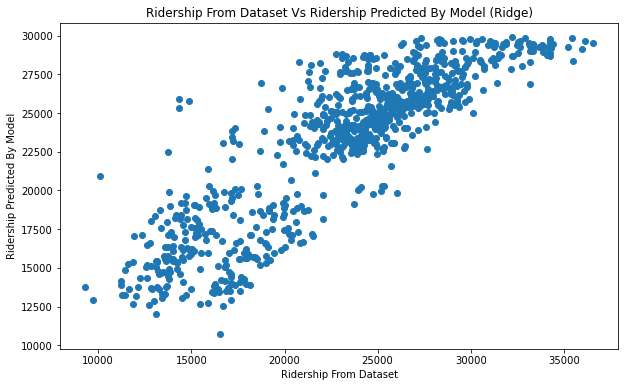

In [ ]:
plt.scatter(y_test, ridge_cv.predict(X_test_scaled))
plt.xlabel('Ridership From Dataset')
plt.ylabel('Ridership Predicted By Model')
plt.title("Ridership From Dataset Vs Ridership Predicted By Model (Ridge)")

In [ ]:
from sklearn import metrics
# TimeSeries Cross validation
tscv = TimeSeriesSplit(n_splits=10)

# Let's create a new simple linear regressor
ridge_m=Ridge(alpha = 0.0001, solver='sag')

# Conduct 3-fold cross validation
rmse=[]
r2 =[]

for train_index, test_index in tscv.split(X):
    X_train_scaled, X_test_scaled = X[train_index],X[test_index]
    y_train, y_test = y[train_index],y[test_index]
    
    ridge_m.fit(X_train_scaled, y_train)
    y_pred = ridge_m.predict(X_test_scaled)
    
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    r2.append(metrics.r2_score(y_test,y_pred))
    

print(rmse)
print(r2)

[6409.274091681847, 5890.193445597046, 5652.86291426209, 6005.889978257927, 5722.273692918084, 4845.700001577234, 4519.480975846781, 4749.533684642669, 4769.908729451873, 4474.9786733944675]
[-0.03453667593450982, -0.17595598131120593, -0.3094968156246336, -0.3603951847965545, -0.15605790794628738, -0.03544456603893642, -0.020441595640617205, -0.005314282767779233, -0.003799972672634988, -0.08102525638453839]


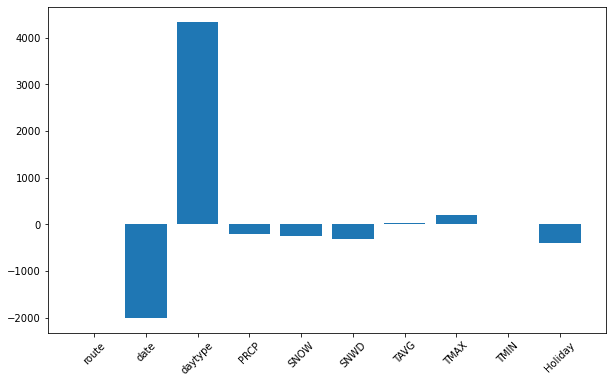

In [ ]:
scaler = StandardScaler()

Xc = route79.drop("rides", axis=1).values
yc = route79["rides"].values

Xc_scaled = scaler.fit_transform(Xc)

names = route79.drop("rides", axis=1).columns
lasso = Lasso(alpha=20)
lasso_coef = lasso.fit(Xc_scaled, yc).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [ ]:
route79.set_index('date')

,route,daytype,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,Holiday,rides
date,,,,,,,,,,
2012-01-01,79,0.0,0.025275,0.000000,0.000000,36.30,44.600000,28.000000,0.0,13811
2012-01-02,79,0.0,0.016667,0.137838,0.125000,26.20,33.400000,19.000000,0.0,14697
2012-01-03,79,1.0,0.003448,0.027500,0.025532,19.25,26.300000,12.200000,0.0,27544
2012-01-04,79,1.0,0.000000,0.000000,0.000000,28.40,36.800000,20.000000,0.0,27165
2012-01-05,79,1.0,0.000000,0.000000,0.000000,36.45,47.000000,25.900000,0.0,26364
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,79,1.0,0.000000,0.000000,0.000000,37.00,46.666667,31.111111,0.0,19587
2019-12-28,79,0.0,0.011720,0.000000,0.000000,34.00,46.750000,28.000000,0.0,15678
2019-12-29,79,0.0,0.818835,0.000000,0.000000,52.00,58.111111,41.222222,0.0,12582


In [ ]:
route79.reset_index(inplace=True)
route79.head()

,level_0,index,route,date,daytype,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,Holiday,rides,day_number
0,0,50,79,2012-01-01,0.0,0.025275,0.000000,0.000000,36.30,44.6,28.0,0.0,13811,50
1,1,139,79,2012-01-02,0.0,0.016667,0.137838,0.125000,26.20,33.4,19.0,0.0,14697,139
2,2,238,79,2012-01-03,1.0,0.003448,0.027500,0.025532,19.25,26.3,12.2,0.0,27544,238
3,3,373,79,2012-01-04,1.0,0.000000,0.000000,0.000000,28.40,36.8,20.0,0.0,27165,373
4,4,508,79,2012-01-05,1.0,0.000000,0.000000,0.000000,36.45,47.0,25.9,0.0,26364,508


In [ ]:
route79['day_number'] = route79.index
route79.head()

,level_0,index,route,date,daytype,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,Holiday,rides,day_number
0,0,50,79,2012-01-01,0.0,0.025275,0.000000,0.000000,36.30,44.6,28.0,0.0,13811,0
1,1,139,79,2012-01-02,0.0,0.016667,0.137838,0.125000,26.20,33.4,19.0,0.0,14697,1
2,2,238,79,2012-01-03,1.0,0.003448,0.027500,0.025532,19.25,26.3,12.2,0.0,27544,2
3,3,373,79,2012-01-04,1.0,0.000000,0.000000,0.000000,28.40,36.8,20.0,0.0,27165,3
4,4,508,79,2012-01-05,1.0,0.000000,0.000000,0.000000,36.45,47.0,25.9,0.0,26364,4


In [ ]:
# Change order of columns
route79 = route79[['route', 'date', 'day_number','daytype', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 
                   'TMAX', 'TMIN', 'Holiday', 'rides']]
route79.head()

,route,date,day_number,daytype,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,Holiday,rides
0,79,2012-01-01,0,0.0,0.025275,0.000000,0.000000,36.30,44.6,28.0,0.0,13811
1,79,2012-01-02,1,0.0,0.016667,0.137838,0.125000,26.20,33.4,19.0,0.0,14697
2,79,2012-01-03,2,1.0,0.003448,0.027500,0.025532,19.25,26.3,12.2,0.0,27544
3,79,2012-01-04,3,1.0,0.000000,0.000000,0.000000,28.40,36.8,20.0,0.0,27165
4,79,2012-01-05,4,1.0,0.000000,0.000000,0.000000,36.45,47.0,25.9,0.0,26364


In [ ]:
X = route79.values[:, 2:10]
y = route79.values[:, 11]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Test ridge model
kf = KFold(n_splits=5, shuffle=False)
param_grid = {'alpha': np.arange(0.0001, 1, 10),"solver": ['sag', 'lsqr', 'saga']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=3)
ridge_cv.fit(X_train_scaled, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'sag', 'alpha': 0.0001} 0.7581950173377592


In [ ]:
# test lasso model
param_grid = {'alpha': np.arange(0.0001, 50, 10)}
lasso = Lasso()
lasso_cv = RandomizedSearchCV(lasso, param_grid, cv=kf, n_iter=3)
lasso_cv.fit(X_train_scaled, y_train)
print(lasso_cv.best_params_, lasso_cv.best_score_)

{'alpha': 0.0001} 0.7582308529303173


/Users/mariacuevas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.796e+09, tolerance: 5.202e+06
  model = cd_fast.enet_coordinate_descent(
/Users/mariacuevas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.552e+09, tolerance: 5.084e+06
  model = cd_fast.enet_coordinate_descent(
/Users/mariacuevas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

In [7]:
data_month = pd.read_csv('./data/month_rides_with_dummy_preprocessed.csv')

In [8]:
print(data_month.head())
print(data_month.info())

   1  10  100  1001  103  106  108  11  111  111A  ...  daytype  rides  \
0  0   0    0     0    0    0    0   0    0     0  ...        0   6793   
1  0   0    0     0    0    0    0   0    0     1  ...        1    150   
2  0   0    0     0    0    0    0   0    0     0  ...        1   5573   
3  0   0    0     0    0    0    0   0    0     0  ...        0   8116   
4  0   0    0     0    0    0    0   0    0     0  ...        0   4067   

       PRCP      SNOW       SNWD  TAVG       TMAX  TMIN  year  month  
0  0.002151  0.013889   2.706522  17.0  26.500000   2.3  2018      1  
1  0.000000  0.000000   0.000000  35.0  38.800000  23.6  2018      1  
2  0.000000  0.001266   2.788372   5.0  12.111111  -3.3  2018      1  
3  0.334043  3.534568  13.872727  20.0  23.500000  12.9  2018      2  
4  0.100333  1.367568   4.015556  27.0  39.100000  16.2  2018      2  

[5 rows x 141 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84071 entries, 0 to 84070
Columns: 141 entries, 1 to mo

In [9]:
data_rides_coded = pd.read_csv('./data/month_data_with_route_codes.csv')

In [10]:
print(data_rides_coded)

      route  daytype  rides      PRCP      SNOW       SNWD  TAVG       TMAX  \
0        53        0   6793  0.002151  0.013889   2.706522  17.0  26.500000   
1      111A        1    150  0.000000  0.000000   0.000000  35.0  38.800000   
2        94        1   5573  0.000000  0.001266   2.788372   5.0  12.111111   
3         8        0   8116  0.334043  3.534568  13.872727  20.0  23.500000   
4       155        0   4067  0.100333  1.367568   4.015556  27.0  39.100000   
...     ...      ...    ...       ...       ...        ...   ...        ...   
84066   X98        1      1  0.000000  0.000000   0.000000  42.0  52.000000   
84067   X98        1     17  0.000000  0.000000   0.000000  56.0  61.555556   
84068   X98        1     18  0.000000  0.000000   0.000000  37.0  46.666667   
84069   X98        0      1  0.011720  0.000000   0.000000  34.0  46.750000   
84070   X98        1     14  0.359697  0.045455   0.025000  38.0  50.666667   

            TMIN  year  month  route_coded  
0     

In [12]:
X=data_rides_coded.drop(['rides', 'route'],axis=1).values
y=data_rides_coded['rides'].values


In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Test ridge model
kf = KFold(n_splits=10, shuffle=True, random_state = 40)
param_grid = {'alpha': np.arange(0.0001, 1, 10),"solver": ['sag', 'lsqr', 'saga']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=3)
ridge_cv.fit(X_train_scaled, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'sag', 'alpha': 0.0001} 0.7912118133208585


In [16]:
# test lasso model
param_grid = {'alpha': np.arange(0.0001, 50, 10)}
lasso = Lasso()
lasso_cv = RandomizedSearchCV(lasso, param_grid, cv=kf, n_iter=3)
lasso_cv.fit(X_train_scaled, y_train)
print(lasso_cv.best_params_, lasso_cv.best_score_)

/Users/mariacuevas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+10, tolerance: 1.465e+08
  model = cd_fast.enet_coordinate_descent(
/Users/mariacuevas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.195e+10, tolerance: 1.461e+08
  model = cd_fast.enet_coordinate_descent(
/Users/mariacuevas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

{'alpha': 0.0001} 0.7912129660388529


/Users/mariacuevas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.393e+10, tolerance: 1.627e+08
  model = cd_fast.enet_coordinate_descent(


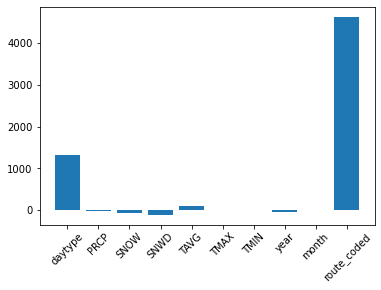

In [34]:
Xc = data_rides_coded.drop({"rides", 'route'}, axis=1).values
yc = data_rides_coded["rides"].values

Xc_scaled = scaler.fit_transform(Xc)

names = data_rides_coded.drop({"rides", 'route'}, axis=1).columns
lasso = Lasso(alpha=20)
lasso_coef = lasso.fit(Xc_scaled, yc).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [17]:
ridge_m=Ridge(alpha = 0.0001, solver='sag')

# Conduct 3-fold cross validation
rmse=[]
r2 =[]

for train_index, test_index in kf.split(X):
    X_train_scaled, X_test_scaled = X[train_index],X[test_index]
    y_train, y_test = y[train_index],y[test_index]
    
    ridge_m.fit(X_train_scaled, y_train)
    y_pred = ridge_m.predict(X_test_scaled)
    
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    r2.append(metrics.r2_score(y_test,y_pred))
    

print(rmse)
print(r2)

[2403.6000279487607, 2368.6050852320427, 2374.1216993216253, 2397.4543243634957, 2367.0869770372365, 2389.9786049433897, 2430.1760717908287, 2386.905262118082, 2436.485954610517, 2369.479797562477]
[0.792573750827579, 0.7927378325165311, 0.7911403949149123, 0.7888408497142817, 0.7940863014919505, 0.7922782851221809, 0.7885120081713398, 0.7919134654948753, 0.7923763633421581, 0.7975382660062309]


### Build Linear Regression models (LASSO and Ridge) using dataset with dummy variable for route

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score

In [27]:
bus_ridership_all_preprocessed=pd.read_csv('./data/month_rides_with_dummy_preprocessed.csv')

In [28]:
X=bus_ridership_all_preprocessed.drop('rides',axis=1).values
y=bus_ridership_all_preprocessed['rides'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=1)

In [29]:
# Scale X_train and X_test
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [31]:
# Test LASSO model
kf = KFold(n_splits=5, shuffle=True)
param_grid = {'alpha': np.arange(0.0001, 50, 10)}
lasso = Lasso()
lasso_cv = RandomizedSearchCV(lasso, param_grid, cv=kf, n_iter=2)
lasso_cv.fit(X_train_scaled, y_train)
print(lasso_cv.best_params_, lasso_cv.best_score_)

{'alpha': 20.0001} 0.9233672958661163


In [32]:
lasso = Lasso(alpha = 20.0001)
lasso.fit(X_train_scaled, y_train)

y_pred_l=lasso.predict(X_test_scaled)

Text(0.5, 1.0, 'Ridership From Dataset Vs Ridership Predicted By Model (LASSO)')

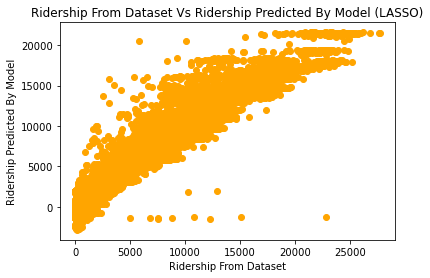

In [33]:
plt.scatter(y_test, y_pred_l, c ='orange')
plt.xlabel('Ridership From Dataset')
plt.ylabel('Ridership Predicted By Model')
plt.title("Ridership From Dataset Vs Ridership Predicted By Model (LASSO)")

In [34]:
print("R Squared: ", lasso.score(X_test_scaled,y_test))
print("Adjusted R square: ", 1 - (1-r2_score(y_test, y_pred_l)) * (len(y)-1)/(len(y)-X.shape[1]-1))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred_l))
print("Mean Absolute Percentage Error: ",metrics.mean_absolute_percentage_error(y_test,y_pred_l))
print("Absolute relative error: ",(metrics.mean_absolute_error(y_test,y_pred_l)/len(y_test)*100))
print("Mean squared error: ",metrics.mean_squared_error(y_test,y_pred_l))
print("Root Mean squared error: ",metrics.mean_squared_error(y_test,y_pred_l,squared=False))

R Squared:  0.9274945333159215
Adjusted R square:  0.9273735900854225
Mean Absolute Error:  1008.2631268714633
Mean Absolute Percentage Error:  2.3523034178252415
Absolute relative error:  3.9975542259593344
Mean squared error:  1982223.8399730995
Root Mean squared error:  1407.914713316506


In [35]:
# Test Ridge model
kf = KFold(n_splits=5, shuffle=True)
param_grid = {'alpha': np.arange(0.0001, 1, 10),"solver": ['sag', 'lsqr', 'saga']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train_scaled, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'lsqr', 'alpha': 0.0001} 0.9254165363015707


In [36]:
ridge = Ridge(alpha = 0.0001, solver = 'sag')
ridge.fit(X_train_scaled, y_train)

y_pred_r=ridge.predict(X_test_scaled)

Text(0.5, 1.0, 'Ridership From Dataset Vs Ridership Predicted By Model (Ridge)')

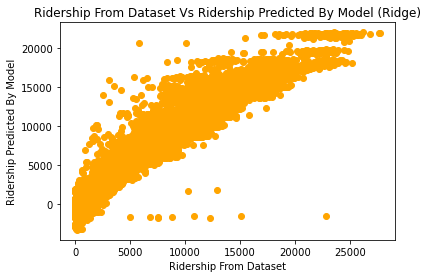

In [37]:
plt.scatter(y_test, y_pred_r, c ='orange')
plt.xlabel('Ridership From Dataset')
plt.ylabel('Ridership Predicted By Model')
plt.title("Ridership From Dataset Vs Ridership Predicted By Model (Ridge)")

In [38]:
print("R Squared: ", ridge.score(X_test_scaled,y_test))
print("Adjusted R square: ", 1 - (1-r2_score(y_test, y_pred_r)) * (len(y)-1)/(len(y)-X.shape[1]-1))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred_r))
print("Mean Absolute Percentage Error: ",metrics.mean_absolute_percentage_error(y_test,y_pred_r))
print("Absolute relative error: ",(metrics.mean_absolute_error(y_test,y_pred_r)/len(y_test)*100))
print("Mean squared error: ",metrics.mean_squared_error(y_test,y_pred_r))
print("Root Mean squared error: ",metrics.mean_squared_error(y_test,y_pred_r,squared=False))

R Squared:  0.9296927526625585
Adjusted R square:  0.9295754761865994
Mean Absolute Error:  952.805784487212
Mean Absolute Percentage Error:  2.205536944604341
Absolute relative error:  3.7776773629657123
Mean squared error:  1922126.8156565754
Root Mean squared error:  1386.4078821387936


In [39]:
ridge_m=Ridge(alpha = 0.0001, solver='lsqr')

# Conduct 3-fold cross validation
rmse=[]
r2 =[]

for train_index, test_index in kf.split(X):
    X_train_scaled, X_test_scaled = X[train_index],X[test_index]
    y_train, y_test = y[train_index],y[test_index]
    
    ridge_m.fit(X_train_scaled, y_train)
    y_pred_r = ridge_m.predict(X_test_scaled)
    
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test,y_pred_r)))
    r2.append(metrics.r2_score(y_test,y_pred_r))
    

print(rmse)
print(r2)

[1608.5242782906641, 1598.729741273948, 1599.0667207606962, 1623.2081314650297, 1585.7312275411625]
[0.9058814431332569, 0.9081633535333855, 0.9092974799427496, 0.9024456755437134, 0.9076566211954433]


### Create and Test Neural Network Model (MLP Regressor)

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime as dt
from sklearn.neural_network import MLPRegressor
import numpy

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import cross_val_predict

In [42]:
regr=MLPRegressor(random_state=1, max_iter=3000,solver='adam').fit(X_train_scaled,y_train)
regr.predict(X_test_scaled)
regr.score(X_test_scaled,y_test)

0.965020056287046

In [43]:
y_pred_n=regr.predict(X_test_scaled)

In [44]:
df_score=pd.DataFrame({'actual':y_test,'predicted':y_pred_n})
df_score.head()

,actual,predicted
0,5573,7462.352583
1,243,192.251048
2,1957,2059.295944
3,10469,11032.174548
4,9995,9184.455617


Text(0.5, 1.0, 'Ridership From Dataset Vs Ridership Predicted By Model (MLPR)')

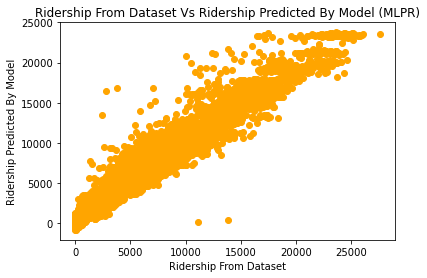

In [45]:
plt.scatter(y_test, y_pred_n, c = 'orange')
plt.xlabel('Ridership From Dataset')
plt.ylabel('Ridership Predicted By Model')
plt.title("Ridership From Dataset Vs Ridership Predicted By Model (MLPR)")

In [46]:
print("R Squared: ", regr.score(X_test_scaled,y_test))
print("Adjusted R Squared: ", 1 - (1-r2_score(y_test, y_pred_n)) * (len(y)-1)/(len(y)-X.shape[1]-1))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred_n))
print("Mean Absolute Percentage Error: ",metrics.mean_absolute_percentage_error(y_test,y_pred_n))
print("Absolute relative error: ",(metrics.mean_absolute_error(y_test,y_pred_n)/len(y_test)*100))
print("Mean squared error: ",metrics.mean_squared_error(y_test,y_pred_n))
print("Root Mean squared error: ",metrics.mean_squared_error(y_test,y_pred_n,squared=False))

R Squared:  0.965020056287046
Adjusted R Squared:  0.9649617077570828
Mean Absolute Error:  604.1191587166729
Mean Absolute Percentage Error:  0.8954580667257911
Absolute relative error:  3.5929532456088555
Mean squared error:  952516.4894538673
Root Mean squared error:  975.9695125637211


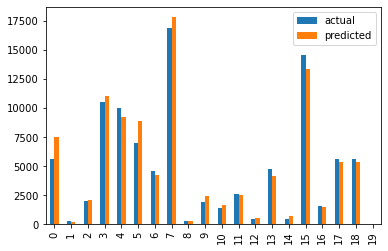

In [47]:
df_score_20=df_score.head(20)
df_score_20.plot(kind='bar')
plt.show()

Text(0, 0.5, 'cost')

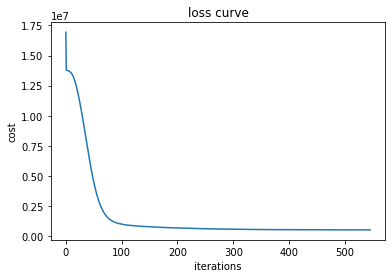

In [48]:
plt.plot(regr.loss_curve_)
plt.title('loss curve')
plt.xlabel('iterations')
plt.ylabel('cost')

In [51]:
pre1= cross_val_predict(regr,X_train_scaled,y_train,cv=3)

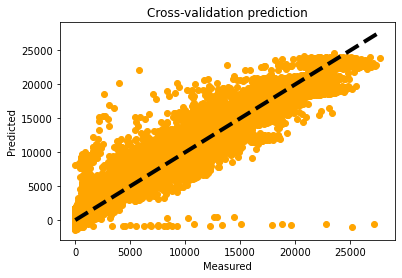

In [53]:
fig,ax=plt.subplots()
ax.scatter(y_train,pre1,c = 'orange')
ax.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],"k--",lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.title("Cross-validation prediction")
plt.savefig("Cross-validation prediction.png")
plt.show()

#### Cross-validation with 5 KFold and finding r squared

In [54]:
scores=cross_val_score(regr,X_train_scaled,y_train,cv=5)

In [55]:
print("Fit scores: {}".format(scores))

Fit scores: [0.96998337 0.97305859 0.93159774 0.96911405 0.94948155]


In [56]:
print("%0.2f accuracy with standard deviation of %0.5f"%(scores.mean(),scores.std()))

0.96 accuracy with standard deviation of 0.01588


In [57]:
df_score_cv=pd.DataFrame({'CV':range(1,6),'Accuracy':scores})
print(df_score_cv)

   CV  Accuracy
0   1  0.969983
1   2  0.973059
2   3  0.931598
3   4  0.969114
4   5  0.949482


In [58]:
br_cv=KFold(n_splits=5)

In [59]:
regr_500=MLPRegressor(random_state=1, activation= 'relu', alpha= 0.0001, learning_rate= 'adaptive',
                      learning_rate_init= 0.01, max_iter= 500, solver= 'adam',early_stopping=True,
                      validation_fraction=0.4).fit(X_train_scaled,y_train)
#regr_500.predict(X_test_scaled)
#regr_500.score(X_test_scaled,y_test)

In [60]:
y_pred_500=regr_500.predict(X_test_scaled)
from sklearn import metrics
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_pred_500))
print("Mean Absolute Percentage Error: ",metrics.mean_absolute_percentage_error(y_test,y_pred_500))
print("Absolute relative error: ",(metrics.mean_absolute_error(y_test,y_pred_500)/len(y_test)*100))
print("Mean squared error: ",metrics.mean_squared_error(y_test,y_pred_500))
print("Root Mean squared error: ",metrics.mean_squared_error(y_test,y_pred_500,squared=False))

Mean Absolute Error:  593.9277690689918
Mean Absolute Percentage Error:  0.5587128020539667
Absolute relative error:  3.5323407224276897
Mean squared error:  946620.9061633555
Root Mean squared error:  972.9444517357379


#### Hyperparameter Tuning

In [61]:
pipe=make_pipeline(MLPRegressor())
param_grid={'mlpregressor__activation':
           ['identity','logistic','tanh','relu'],'mlpregressor__solver':['adam'],'mlpregressor__learning_rate':
           ['constant','adaptive'],'mlpregressor__alpha':[0.0001,0.05],'mlpregressor__max_iter':[300,500,3000],
           'mlpregressor__learning_rate_init':[0.01,0.1]}

In [62]:
grid=GridSearchCV(pipe,param_grid,cv=3)

In [ ]:
grid.fit(X_train_scaled,y_train)

In [ ]:
print("Best parameter: ",grid.best_params_,grid.cv_results_['mean_train_score'],grid.cv_results_['mean_test_score'])

In [ ]:
grid_prediction= grid.predict(X_test_scaled)

In [ ]:
df_2=pd.DataFrame({'Actual':y_test,'Prediction':grid_prediction})
df_2.head()

In [ ]:
df_2_score_20=df_2.head(20)
df_score_20.plot(kind='bar')
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='blue')
plt.show()

In [ ]:
print("R square on training dataset",grid.score(X_train_scaled,y_train))
print("R square on testing dataset",grid.score(X_test_scaled,y_test))

print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,grid_prediction))
print("Mean Absolute Percentage Error: ",metrics.mean_absolute_percentage_error(y_test,grid_prediction))

print("Mean squared error: ",metrics.mean_squared_error(y_test,grid_prediction))
print("Root Mean squared error: ",metrics.mean_squared_error(y_test,grid_prediction,squared=False))

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes,train_scores,validation_scores=learning_curve(
    estimator= MLPRegressor(random_state=1, max_iter=3000,solver='adam'), X=X_train_scaled,y=y_train,
    cv=3, train_sizes=[100,1000,10000,20000,39232],
    scoring='r2'
)

In [ ]:
train_scores_mean=-train_scores.mean(axis=1)
validation_scores_mean=-validation_scores.mean(axis=1)

plt.plot(train_sizes,train_scores_mean,label="training error")
plt.plot(train_sizes,validation_scores_mean,label="validation error")
plt.xlabel('Training size')
plt.ylabel('score')
plt.legend()
plt.savefig("Learning_curve.png")
plt.show()